In [1]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
diabetes = load_diabetes()
print(diabetes['DESCR'])
#print(diabetes['data'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
pd_data = pd.read_csv('diabetes.tab.txt', sep='\t')
#print(pd_data.head())
print(pd_data['BMI'])

0      32.1
1      21.6
2      30.5
3      25.3
4      23.0
       ... 
437    28.2
438    24.9
439    24.9
440    30.0
441    19.6
Name: BMI, Length: 442, dtype: float64


In [4]:
# standardization - raw

x = (pd_data['BMI'] - pd_data['BMI'].mean()) / pd_data['BMI'].std(ddof=0)
print(x)

# standardization - sklearn
val = pd_data['BMI'].values   # numpy 형식
#rint(val.shape)
scaler = StandardScaler().fit(val[:,np.newaxis])
scaler.transform(val[:,np.newaxis])

scaler = StandardScaler().fit_transform(val[:,np.newaxis])

0      1.297088
1     -1.082180
2      0.934533
3     -0.243771
4     -0.764944
         ...   
437    0.413360
438   -0.334410
439   -0.334410
440    0.821235
441   -1.535374
Name: BMI, Length: 442, dtype: float64


In [5]:
# normalization - raw

x = (pd_data['BMI']-pd_data['BMI'].min())/(pd_data['BMI'].max()-pd_data['BMI'].min())
print(x)

# normalization - sklearn

scaler = MinMaxScaler().fit(val[:,np.newaxis])
scaler.transform(val[:,np.newaxis])

0      0.582645
1      0.148760
2      0.516529
3      0.301653
4      0.206612
         ...   
437    0.421488
438    0.285124
439    0.285124
440    0.495868
441    0.066116
Name: BMI, Length: 442, dtype: float64


array([[0.58264463],
       [0.14876033],
       [0.51652893],
       [0.30165289],
       [0.20661157],
       [0.19008264],
       [0.16528926],
       [0.33884298],
       [0.58264463],
       [0.49586777],
       [0.02479339],
       [0.41322314],
       [0.23553719],
       [0.33884298],
       [0.24793388],
       [0.2768595 ],
       [0.50826446],
       [0.39256198],
       [0.30578512],
       [0.2768595 ],
       [0.12809917],
       [0.26033058],
       [0.33057851],
       [0.5785124 ],
       [0.48347107],
       [0.29752066],
       [0.04958678],
       [0.57438017],
       [0.26446281],
       [0.32231405],
       [0.51652893],
       [0.09504132],
       [0.82644628],
       [0.15289256],
       [0.10330579],
       [0.22727273],
       [0.4338843 ],
       [0.38842975],
       [0.61983471],
       [0.40082645],
       [0.31404959],
       [0.08677686],
       [0.30578512],
       [0.25619835],
       [0.60743802],
       [0.2107438 ],
       [0.30165289],
       [0.066

In [6]:
X, y = load_diabetes(return_X_y=True)
print(X[:,2][:10])  #bmi

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215]


In [7]:
x = (pd_data['BMI']-pd_data['BMI'].mean())/(pd_data['BMI'].std(ddof=0)*np.sqrt(len(pd_data['BMI'])))
print(x)

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: BMI, Length: 442, dtype: float64


In [8]:
# abalone

pd_data = pd.read_csv('abalone.data', header=None)
#print(pd_data.head())
s = pd_data.iloc[:,0]
s.unique()
s = s.astype('category')
print(s)
print(s.cat.codes)

mytype = pd.api.types.CategoricalDtype(categories=['F','M','I'])
s2 = pd_data.iloc[:,0].astype(mytype)
print(s2)
print(s2.cat.codes)

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: 0, Length: 4177, dtype: category
Categories (3, object): ['F', 'I', 'M']
0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int8
0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: 0, Length: 4177, dtype: category
Categories (3, object): ['F', 'M', 'I']
0       1
1       1
2       0
3       1
4       2
       ..
4172    0
4173    1
4174    1
4175    0
4176    1
Length: 4177, dtype: int8


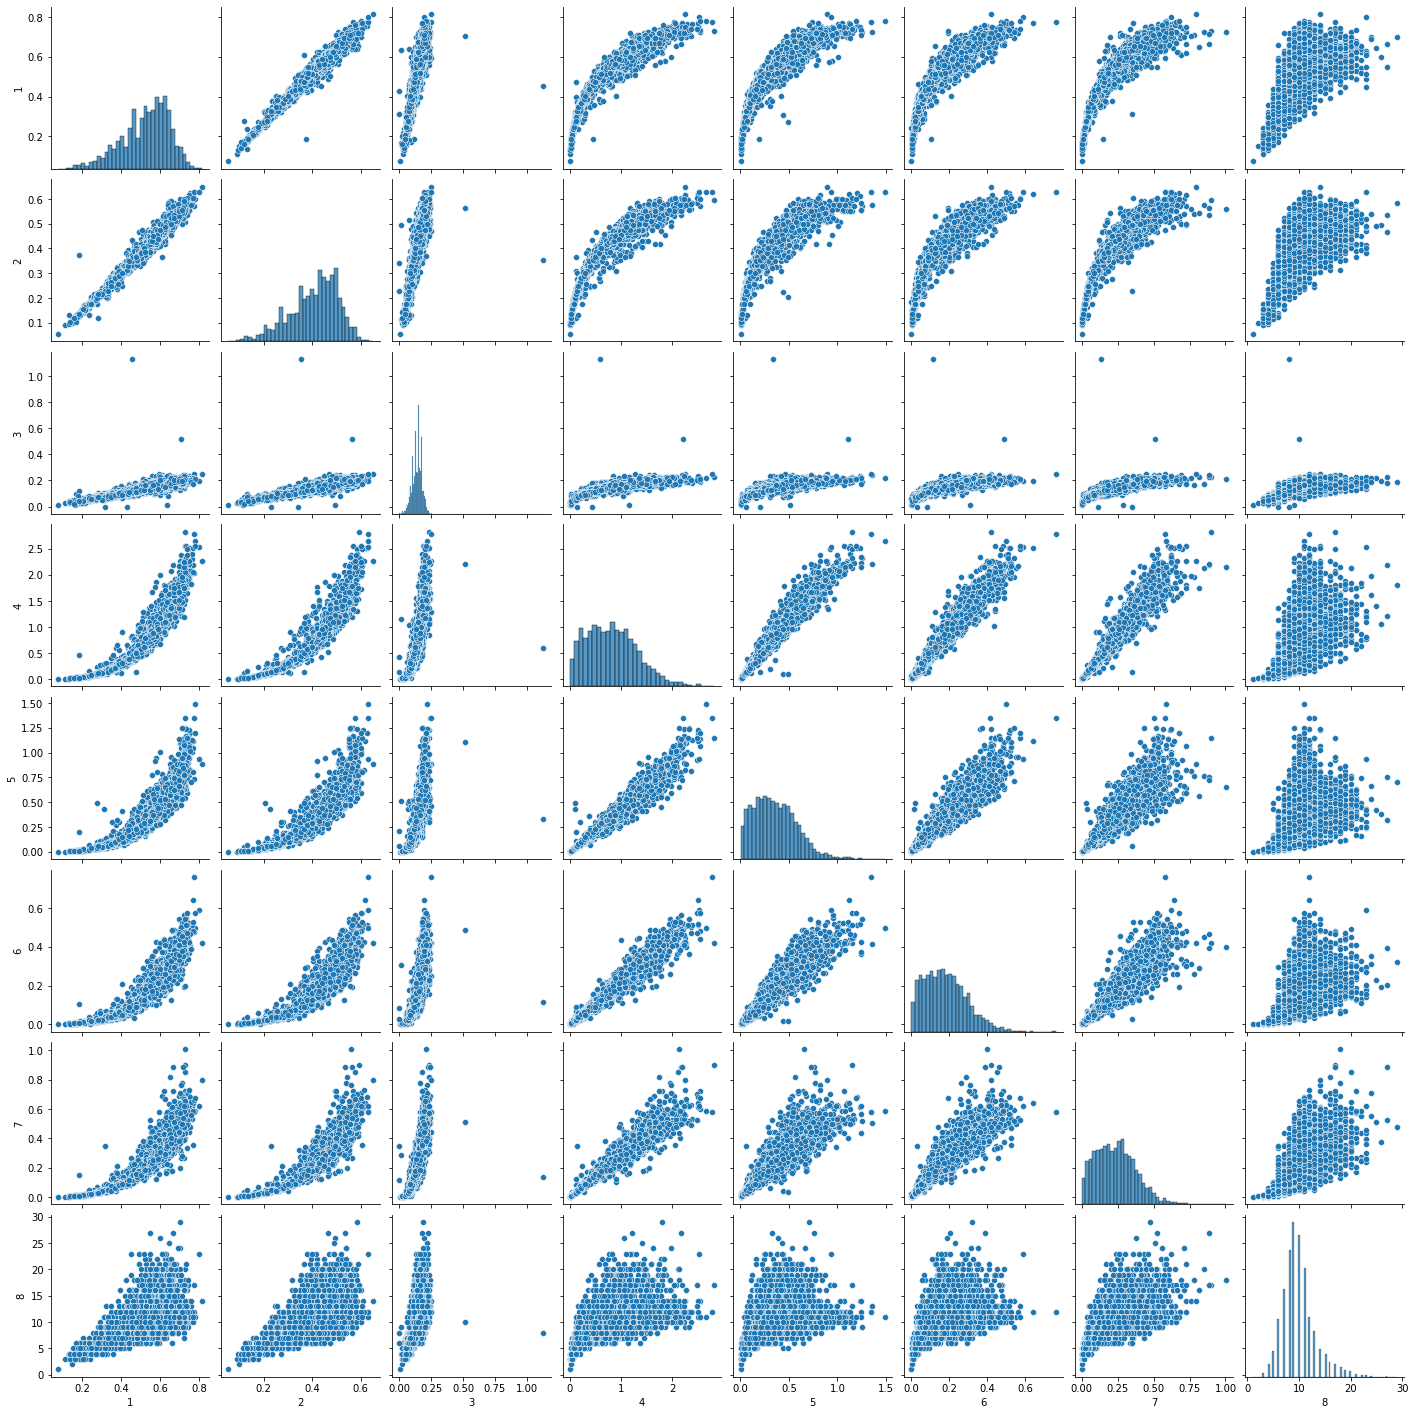

In [9]:
sns.pairplot(pd_data)

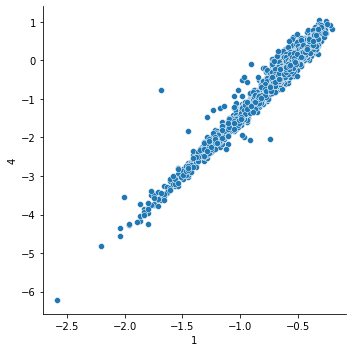

In [10]:
a = np.log(pd_data[1])
b = np.log(pd_data[4])

sns.relplot(x=a, y=b)